In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

%matplotlib inline

**DEFININDO A BASE DE DADOS E FAZENDO UMA PRÉ-SELEÇÃO**

In [56]:
# definindo a variável principal e mudando o nome das colunas
dados = pd.read_table("pes2013P1.csv", sep = ",")

In [57]:
# fazendo a seleção geral
dados = dados[(dados.V9042 == 2)&(dados.V9005 == 1)&(dados.V0402 == 1)&(dados.V8005 > 15)&(dados.V4718 < 99999999999)] # + de 15 anos, carteira ass, pessoa de ref, 1 emprego

**AJUSTANDO A BASE DE DADOS PARA FAZER AS ANÁLISES** 

In [58]:
# renomeando as colunas da tabela geral
colunas = ["UF", "SEXO", "IDADE", "COND_FAM", "COR", "TRABALHOU_REF_WEEK", "N_TRAB_REF_WEEK", "POSIÇÃO_REF_WEEK", "SETOR_REF_WEEK", "CARTEIRA_ASS_REF_WEKK", "ANOS_DE_TRAB_REF_DATE", "ANOS_DE_ESTUDO", "HORAS_DE_TRAB_10PLUS_REF_WEEK", "INSTRUC_PLUS_ALCANÇADA", "REND_MENSAL_TRAB_PRINC_10PLUS"]

columns = {}
i = 0
for c in dados.columns:
    
    columns[c] = colunas[i]
    i+=1
    
dados.rename(columns=columns, inplace=True)

In [59]:
regioes = ["Sul", "Norte", "Nordeste", "Sudeste", "Centro-Oeste"]

In [60]:
# criando a coluna REGIAO
dados["REGIAO"] = "Sul"
condition1 = dados.UF <= 17
condition2 = (dados.UF > 17) & (dados.UF <= 29)
condition3 = (dados.UF > 29) & (dados.UF <= 35)
condition4 = dados.UF > 43

dados.loc[condition1, "REGIAO"] = "Norte"
dados.loc[condition2, "REGIAO"] = "Nordeste"
dados.loc[condition3, "REGIAO"] = "Sudeste"
dados.loc[condition4, "REGIAO"] = "Centro-Oeste"

In [61]:
# mudando a notação dos valores da variável "COR"
racas = ["Indígena", "Branca", "Negra", "Amarela", "Parda"]

dados.COR = dados.COR.astype("category")
dados.COR.cat.categories = racas

In [62]:
# mudando a notação dos valores da variável "SEXO"
dados.SEXO = dados.SEXO.astype("category")
dados.SEXO.cat.categories = ("Masculino", "Feminino")

In [63]:
# separando homens e mulheres
homens = dados[dados.SEXO == "Masculino"]
mulheres = dados[dados.SEXO == "Feminino"]

ANÁLISE 1 
=====

**PARÂMETRO A SER ANALISADO:** Média salarial

**CRITÉRIO DE SELEÇÃO:** Raça

In [64]:
# obtendo o rend médio de cada um dos genêros de cada uma das raças

# INDEX: [Indígena, Branca, Negra, Amarela, Parda]

rendMedioHomens = []
rendMedioMulheres = []

for r in racas:
    
    homem = homens[homens.COR == r]
    mulher = mulheres[mulheres.COR == r]
    
    rendMedioHomem = homem.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    rendMedioMulher = mulher.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    
    rendMedioHomens.append(rendMedioHomem)
    rendMedioMulheres.append(rendMedioMulher)

In [65]:
# obtendo o rend médio de cada um dos genêros por raça

# INDEX: [[IndígenaH, IndígenaM], [BrancaH, BrancaM], [NegraH, NegraM], [AmarelaH, AmarelaM], [PardaH, PardaM]]

homensXMulheres = []

for i in range(len(rendMedioHomens)):
    
    homemXMulher = [rendMedioHomens[i],rendMedioMulheres[i]]
    
    homensXMulheres.append(homemXMulher)

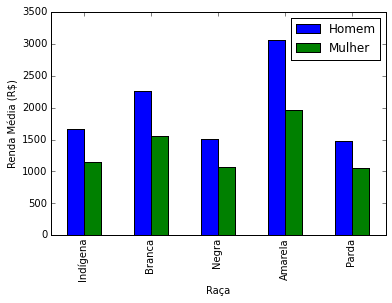

In [66]:
# plotando o gráfico conclusivo da ANÁLISE 1
dataForGraph1 = pd.DataFrame(homensXMulheres, columns=["Homem", "Mulher"], index=racas)
plot = dataForGraph1.plot(kind='bar')
plot.set_ylabel("Renda Média (R$)")
plot.set_xlabel("Raça")

#ANÁLISE 2

**PARÂMETRO A SER ANALISADO:** Média salarial

**CRITÉRIO DE SELEÇÃO:** Região em que reside

In [67]:
# obtendo o rend médio de cada um dos genêros de cada uma das regiões

# INDEX: [Sul, Norte, Nordeste, Sudeste, Centro-Oeste]

rendMedioHomensReg = []
rendMedioMulheresReg = []

for r in regioes:
    
    homem = homens[homens.REGIAO == r]
    mulher = mulheres[mulheres.REGIAO == r]
    
    rendMedioHomem = homem.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    rendMedioMulher = mulher.REND_MENSAL_TRAB_PRINC_10PLUS.mean()
    
    rendMedioHomensReg.append(rendMedioHomem)
    rendMedioMulheresReg.append(rendMedioMulher)

In [68]:
# obtendo o rend médio de cada um dos gêneros por região

# INDEX: [[SulH, SulM], [NorteH, NorteM], [SudesteH, SudesteM], [Centro-OesteH, Centro-OesteM]]

homensXMulheresReg = []

for i in range(len(rendMedioHomensReg)):
    
    homemXMulher = [rendMedioHomensReg[i],rendMedioMulheresReg[i]]
    
    homensXMulheresReg.append(homemXMulher)

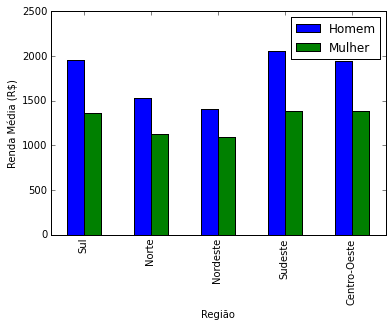

In [90]:
# plotando o gráfico conclusivo da ANÁLISE 1
dataForGraph1 = pd.DataFrame(homensXMulheresReg, columns=["Homem", "Mulher"], index=regioes)
plot = dataForGraph1.plot(kind='bar')
plot.set_ylabel("Renda Média (R$)")
plot.set_xlabel("Região")

In [71]:
dados

,UF,SEXO,IDADE,COND_FAM,COR,TRABALHOU_REF_WEEK,N_TRAB_REF_WEEK,POSIÇÃO_REF_WEEK,SETOR_REF_WEEK,CARTEIRA_ASS_REF_WEKK,ANOS_DE_TRAB_REF_DATE,ANOS_DE_ESTUDO,HORAS_DE_TRAB_10PLUS_REF_WEEK,INSTRUC_PLUS_ALCANÇADA,REND_MENSAL_TRAB_PRINC_10PLUS,REGIAO
4,11,Masculino,23,1,Parda,1,1,1,2,2,0,1,3,1,800,Norte
9,11,Masculino,25,1,Parda,1,1,1,2,2,0,8,3,2,1100,Norte
17,11,Masculino,28,1,Branca,1,1,1,2,2,0,5,3,2,1300,Norte
18,11,Masculino,41,1,Branca,1,1,1,2,2,2,5,3,2,1400,Norte
26,11,Masculino,36,1,Branca,1,1,1,2,2,2,8,3,2,1100,Norte
29,11,Feminino,25,1,Branca,1,1,2,NaN,2,4,12,3,5,678,Norte
36,11,Feminino,40,1,Parda,1,1,2,NaN,2,2,1,2,1,500,Norte
80,11,Masculino,48,1,Parda,1,1,1,2,2,5,5,4,2,3000,Norte
84,11,Masculino,37,1,Negra,1,1,1,4,2,5,12,2,5,2050,Norte
124,11,Masculino,23,1,Branca,1,1,1,2,2,1,12,4,5,850,Norte


In [72]:
# obtendo a idade de cada um dos genêros de cada uma das regiões

# INDEX: [0,58]
'''
idades = dados.IDADE

idadeHomens = []
idadeMulheres = []

for d in idades:
    
    homem = homens[homens.IDADE == d]
    mulher = mulheres[mulheres.IDADE == d]
    
    idadeHomens = homem.IDADE.mean()
    idadeMulheres = mulher.IDADE.mean()
    
    rendMedioHomensReg.append(idadeHomens)
    rendMedioMulheresReg.append(idadeMulheres)
    
    # obtendo o rend médio de cada um dos genêros por idade

# INDEX: 

homensXMulheres = []

for i in range(len(idadeHomens)):
    
    homemXMulher = [idadeHomens[i],idadeMulheres[i]]
    
    homensXMulheres.append(homemXMulher)
    '''


'\nidades = dados.IDADE\n\nidadeHomens = []\nidadeMulheres = []\n\nfor d in idades:\n    \n    homem = homens[homens.IDADE == d]\n    mulher = mulheres[mulheres.IDADE == d]\n    \n    idadeHomens = homem.IDADE.mean()\n    idadeMulheres = mulher.IDADE.mean()\n    \n    rendMedioHomensReg.append(idadeHomens)\n    rendMedioMulheresReg.append(idadeMulheres)\n    \n    # obtendo o rend médio de cada um dos genêros por idade\n\n# INDEX: \n\nhomensXMulheres = []\n\nfor i in range(len(idadeHomens)):\n    \n    homemXMulher = [idadeHomens[i],idadeMulheres[i]]\n    \n    homensXMulheres.append(homemXMulher)\n    '

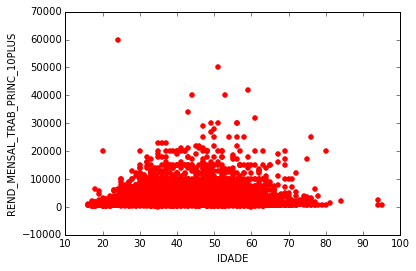

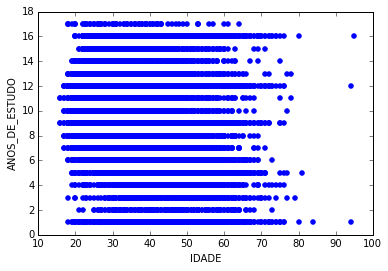

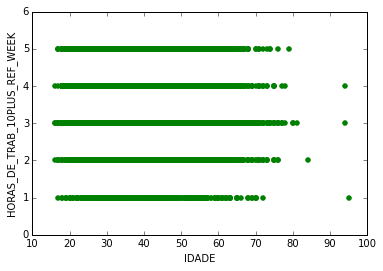

In [97]:

pd.DataFrame.plot(kind='scatter', data=dados, x='IDADE', y='REND_MENSAL_TRAB_PRINC_10PLUS', color='red')
pd.DataFrame.plot(kind='scatter', data=dados, x='IDADE', y='ANOS_DE_ESTUDO', color='blue')
pd.DataFrame.plot(kind='scatter', data=dados, x='IDADE', y='HORAS_DE_TRAB_10PLUS_REF_WEEK', color='green')


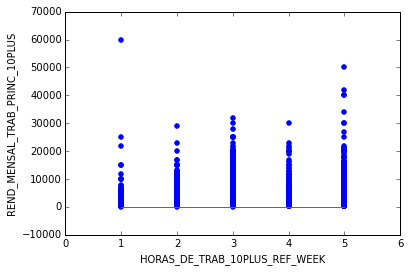

In [99]:
b = dados.IDADE.cov(dados.TRABALHOU_REF_WEEK) / dados.IDADE.var()
a = dados.TRABALHOU_REF_WEEK.mean() - b * dados.IDADE.mean()

pd.DataFrame.plot(kind='scatter', data=dados, x='HORAS_DE_TRAB_10PLUS_REF_WEEK', y='REND_MENSAL_TRAB_PRINC_10PLUS', color='blue')

import matplotlib.pyplot as plt
plt.plot((dados.HORAS_DE_TRAB_10PLUS_REF_WEEK.min(), dados.HORAS_DE_TRAB_10PLUS_REF_WEEK.max()), (a + b * dados.HORAS_DE_TRAB_10PLUS_REF_WEEK.min(), a + b * dados.HORAS_DE_TRAB_10PLUS_REF_WEEK.max()), color='magenta')